# Synthesising Data Set

1. Download Irish Language data sets
2. Cleanse data set, deleting or amending lost values and percentage columns.
3. Analyse dataset and get distribution statistics (mean, max, min, Standars Deviation)
4. Synthetise new data set with random values using the sample statistics.
5. Compare synthetised data set with sample for testing purposes. 

## Irish language data set

As a first step, Irish language use data set, extracted form 2011 census, is downloaded from http://airo.maynoothuniversity.ie/files/dDATASTORE/electoral_divisions/theme_3_electoral_divisions.csv, as referenced in [IRELAND'S OPEN DATA PORTAL](https://data.gov.ie/dataset/irish-language-t3-ed).

However, first attempts resulted in Pandas failing to read the file, due to inconsistencies between coding formats. Therefore, extra instruction specifying the latin encoding was required in order for pandas to be able to read the file properly.

In [22]:
import pandas as pd
df = pd.read_csv('data/theme_3_small_areas.csv', encoding='latin-1')



/home/luis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exploring data and cleansing data set

After the first exploration, there are several fields that will not be useful for our purpose and, thus, need to be removed.
In this case, two different methods in consecutive steps were performed. 

Firstly, using the **iloc** method, the first 5 columns were left out of the DataFrame. Those columns included different geographical codes with no actual meaning for the purpose of this project. Upon checking on the file, an extra row at the end of the file was detected. This row does not belong to the data set, since the only value is a number under a categorical column. This row is considered as a mistake and therefore, is also eliminated by slicing it out of the data set.

The second way for removing columns was the **drop** method, in which column names to be deleted from the DataFrame were listed. In this case, additional geographical codification was removed, although *NUTS_III* and *County* remained for reference purposes, but since these are categoriacal variables, will not be used to estimate distribution statistics. The original dataset includes not only frequencies for different aspects of Irish language usage, but also calculations over these frequencies. In this case, these frequencies were calculated as percentages, but we do not need that calculations for our purpose. Therefore, all columns including percentual calculations over frequencies were eliminated.

According to the documentation, *axis=1* was introduced in order to specify that the registries to eliminate were columns in our DataFrame. Additionally, since the objective is to modify the actual DataFrame, the *inline* parameter was set to ***True***.



In [23]:
# Removing last row and first 5 columns from dataset
df=df.iloc[0:-1,5:]

# Removing unrequired columns 
df.drop(['NUTS_II','Planning Region','Perc_Ability_To_Speak_Irish_Yes_2011','Perc_Ability_To_Speak_Irish_No_2011','Perc_Ability_To_Speak_Irish_Not_Stated_2011','Perc_Freq_Of_Irish_Daily_Within_Education_System_2011','Perc_Freq_Of_Irish_Daily_Within_And_Outside_Education_System_2011','Perc_Freq_Of_Irish_Daily_Outside_Education_System_2011','Perc_Freq_Of_Irish_Weekly_Outside_Education_System_2011','Perc_Freq_Of_Irish_Less_Often_Outside_Education_System_2011','Perc_Freq_Of_Irish_Never_Outside_Education_System_2011','Perc_Freq_Of_Irish_Not_Stated_Outside_Education_System_2011','Perc_Freq_Of_Irish_Outside_Edu_Daily_2011','Perc_Freq_Of_Irish_Outside_Edu_Weekly_2011','Perc_Freq_Of_Irish_Outside_Edu_Less_Often_2011','Perc_Freq_Of_Irish_Outside_Edu_Never','Perc_Freq_Of_Irish_Outside_Edu_Daily_2011','Perc_Freq_Of_Irish_Outside_Edu_Weekly_2011','Perc_Freq_Of_Irish_Outside_Edu_Less_Often_2011','Perc_Freq_Of_Irish_Outside_Edu_Never'], axis=1, inplace=True)

The resulting DataFrame has 18 columns and 184488 rows:

In [3]:
df

,County,NUTS_III,Ability_To_Speak_Irish_Yes_2011,Ability_To_Speak_Irish_No_2011,Ability_To_Speak_Irish_Not_Stated_2011,Ability_To_Speak_Irish_Total_2011,Freq_Of_Irish_Total_2011,Freq_Of_Irish_Daily_Within_Education_System_2011,Freq_Of_Irish_Daily_Within_And_Outside_Education_System_2011,Freq_Of_Irish_Daily_Outside_Education_System_2011,Freq_Of_Irish_Weekly_Outside_Education_System_2011,Freq_Of_Irish_Less_Often_Outside_Education_System_2011,Freq_Of_Irish_Never_Outside_Education_System_2011,Freq_Of_Irish_Not_Stated_Outside_Education_System_2011,Freq_Of_Irish_Outside_Edu_Daily_2011,Freq_Of_Irish_Outside_Edu_Weekly_2011,Freq_Of_Irish _Outside_Edu_Less_Often_2011,Freq_Of_Irish_Outside_Edu_Never_2011
0,Carlow,South-East,147.0,200.0,4.0,351.0,147.0,42.0,3.0,0.0,5.0,58.0,37.0,2.0,0.0,2.0,1.0,0.0
1,Carlow,South-East,158.0,154.0,2.0,314.0,158.0,48.0,0.0,1.0,11.0,64.0,34.0,0.0,0.0,0.0,0.0,0.0
2,Carlow,South-East,154.0,210.0,4.0,368.0,154.0,65.0,3.0,7.0,7.0,45.0,26.0,1.0,2.0,0.0,0.0,1.0
3,Carlow,South-East,143.0,139.0,3.0,285.0,143.0,30.0,5.0,1.0,7.0,59.0,40.0,1.0,4.0,1.0,0.0,0.0
4,Carlow,South-East,87.0,135.0,2.0,224.0,87.0,35.0,0.0,0.0,7.0,22.0,23.0,0.0,0.0,0.0,0.0,0.0
5,Carlow,South-East,130.0,176.0,2.0,308.0,130.0,40.0,2.0,1.0,6.0,37.0,41.0,3.0,2.0,0.0,0.0,0.0
6,Carlow,South-East,127.0,145.0,6.0,278.0,127.0,50.0,3.0,2.0,10.0,33.0,29.0,0.0,0.0,3.0,0.0,0.0
7,Carlow,South-East,99.0,140.0,2.0,241.0,99.0,26.0,0.0,2.0,7.0,36.0,28.0,0.0,0.0,0.0,0.0,0.0
8,Carlow,South-East,48.0,95.0,2.0,145.0,48.0,8.0,3.0,0.0,1.0,19.0,17.0,0.0,0.0,2.0,1.0,0.0
9,Carlow,South-East,82.0,123.0,3.0,208.0,82.0,34.0,2.0,3.0,1.0,28.0,14.0,0.0,0.0,2.0,0.0,0.0


Still, the number of columns still is too big for modelling a synthetised dataset. 

At this point, a methodological decision needs to be made. By simplifying the data set we could be losing correlated variables and, thus, explanation capabilities. 

To avoid deleting variables with high explanatory capabilities, current data set is saved with a different name, for possible dataset redesigning. If our working simplified dataset results in low correlations, we can always introduce some of the previous variables.

Therefore, df_chkpnt is our checkpoint data set, with 18 columns.

In [24]:
# Creating a checkpoint data set
df_chkpnt = df

Before proceeding with the analysis of the variables, a reduction of the number of variables to be used is required. Firstly, variables are listed, specifying their type.

In [25]:
df.dtypes

County                                                           object
NUTS_III                                                         object
Ability_To_Speak_Irish_Yes_2011                                 float64
Ability_To_Speak_Irish_No_2011                                  float64
Ability_To_Speak_Irish_Not_Stated_2011                          float64
Ability_To_Speak_Irish_Total_2011                               float64
Freq_Of_Irish_Total_2011                                        float64
Freq_Of_Irish_Daily_Within_Education_System_2011                float64
Freq_Of_Irish_Daily_Within_And_Outside_Education_System_2011    float64
Freq_Of_Irish_Daily_Outside_Education_System_2011               float64
Freq_Of_Irish_Weekly_Outside_Education_System_2011              float64
Freq_Of_Irish_Less_Often_Outside_Education_System_2011          float64
Freq_Of_Irish_Never_Outside_Education_System_2011               float64
Freq_Of_Irish_Not_Stated_Outside_Education_System_2011          

As a second methodological decision, new columns need to be dropped from the data set. 

Categorical variables (County and NUTS_III) will be kept, but as per their non-numerical nature, will not be used for calculating correlations or central tendencies. In a future development, these variables could be used for testing a predictive model. If a machine learning algorithm is implemented it could be used for checking if, given some parameters regarding the use of Irish language, the county or zone (NUTS_III) could be inferred.

The first three variables, stating the number of Irish speakers, Irish non-speakers and people who did not answer, will also be kept, as those are the core variables in our data set. There is no need to keep the fourth one (Freq_Of_Irish_Total_2011), since it is just a summary variable resulting from adding the aforementioned three variables.

In order to introduce some explanatory and, hopefully, correlated variables into this data set, the use of Irish language within educational system will also be included. Instead of using the detailed information from the original data set, which stated the use of Irish language in daily, weekly and less-often basis, for the purposes of this project we will only keep the daily use of Irish language.

Therefore, columns to be kept are the following:
1. County
2. NUTS_III
3. Ability_To_Speak_Irish_Yes_2011
4. Ability_To_Speak_Irish_No_2011
5. Ability_To_Speak_Irish_Not_Stated_2011
6. Freq_Of_Irish_Daily_Within_Education_System_2011
7. Freq_Of_Irish_Daily_Within_And_Outside_Education_System_2011
8. Freq_Of_Irish_Daily_Outside_Education_System_2011



In [26]:
df=df.iloc[:,:9]


In [27]:
df.drop(['Ability_To_Speak_Irish_Total_2011'], axis=1, inplace=True)

In [28]:
df.dtypes

County                                                           object
NUTS_III                                                         object
Ability_To_Speak_Irish_Yes_2011                                 float64
Ability_To_Speak_Irish_No_2011                                  float64
Ability_To_Speak_Irish_Not_Stated_2011                          float64
Freq_Of_Irish_Total_2011                                        float64
Freq_Of_Irish_Daily_Within_Education_System_2011                float64
Freq_Of_Irish_Daily_Within_And_Outside_Education_System_2011    float64
dtype: object

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df)

/home/luis/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '
/home/luis/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '
/home/luis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/luis/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWa

KeyboardInterrupt: 

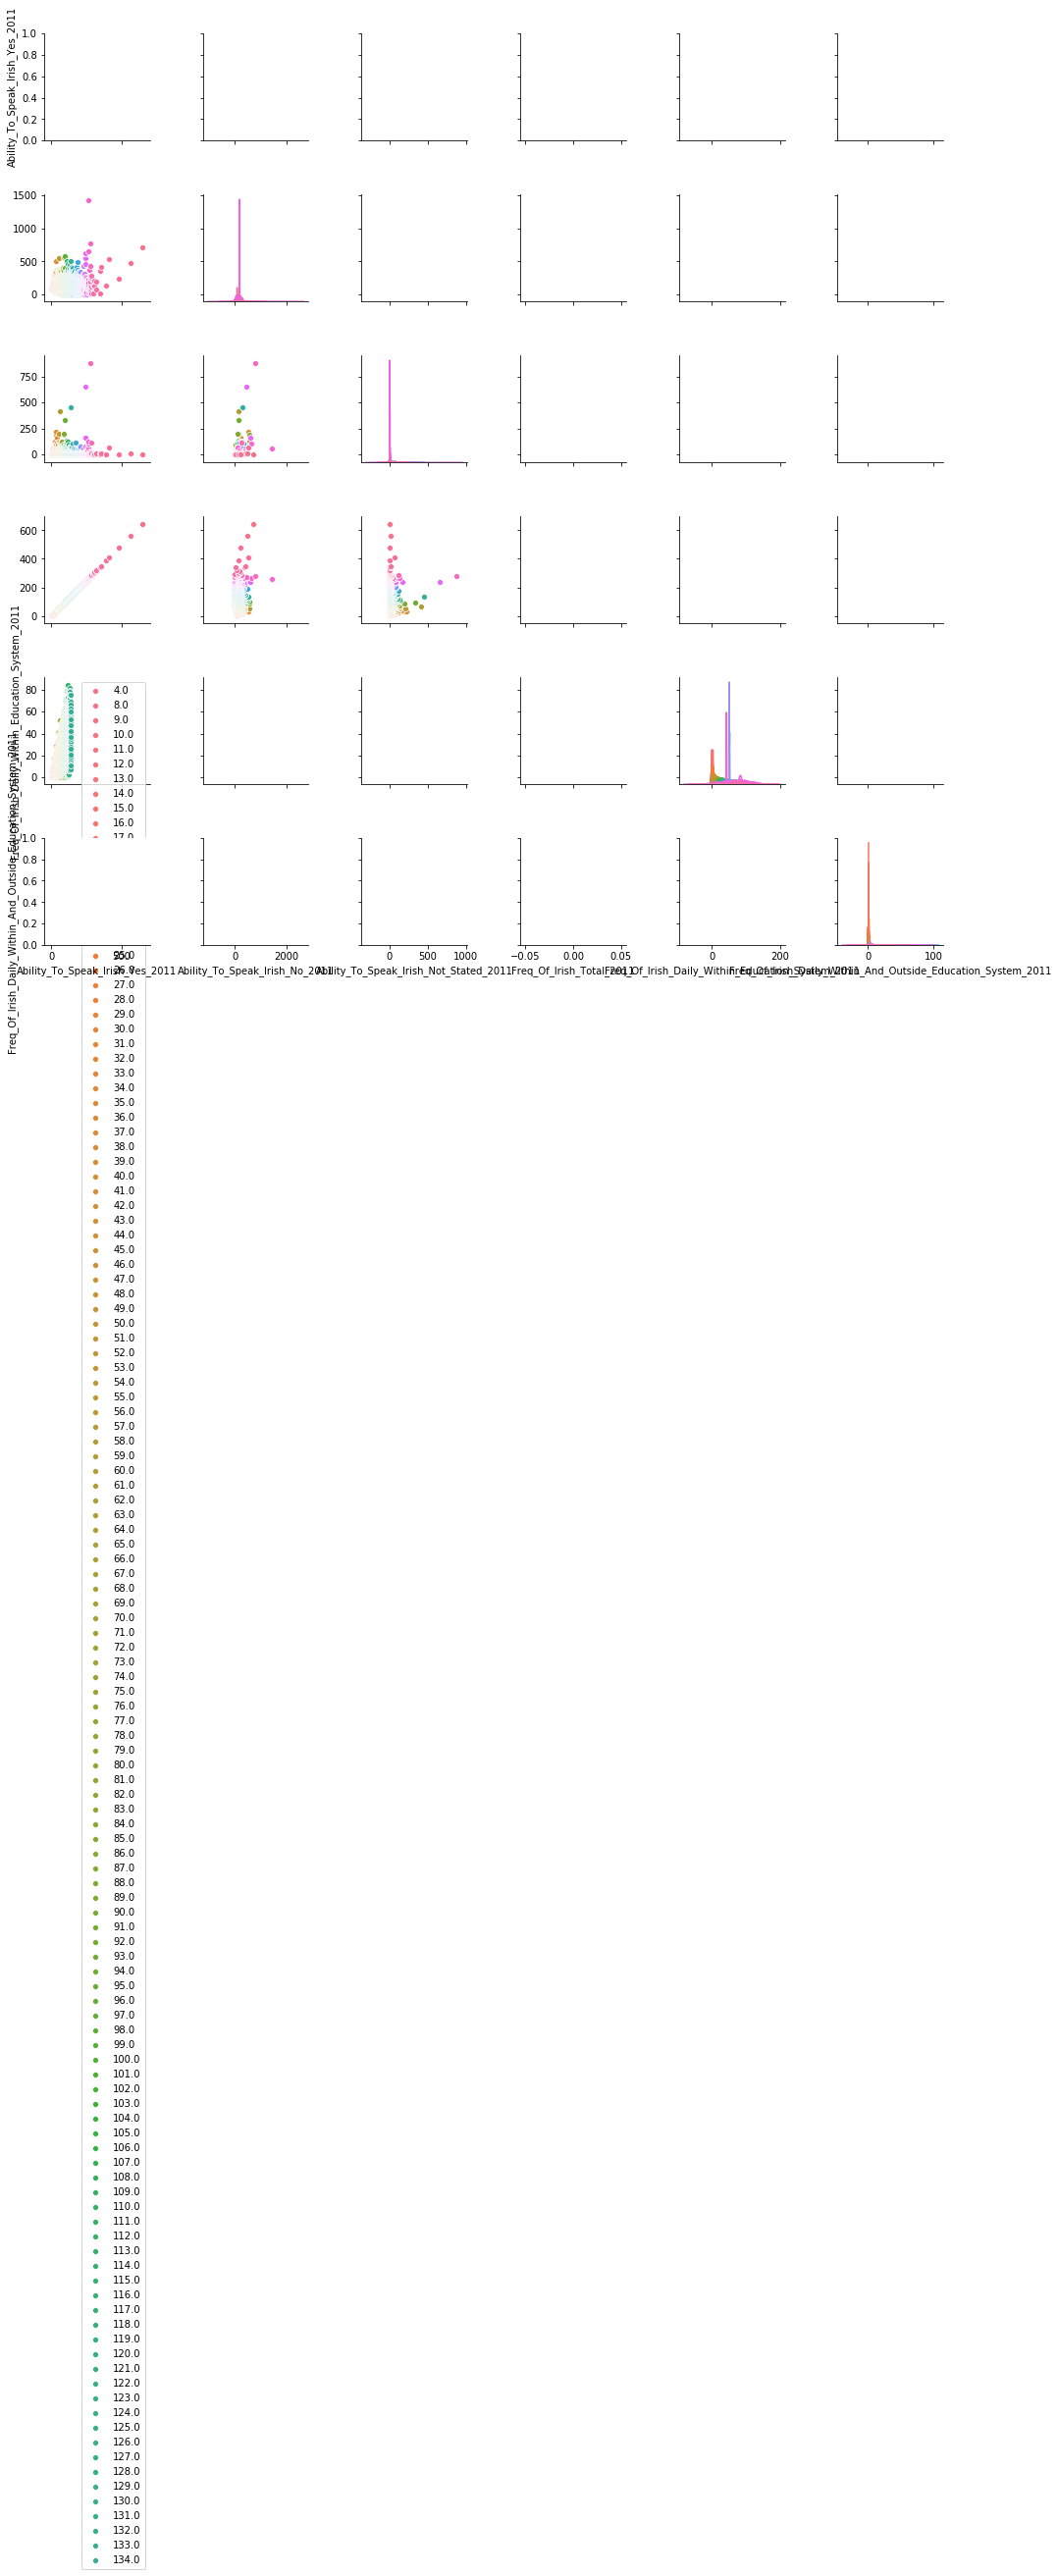

In [10]:
import seaborn as sns
sns.pairplot(df,hue="Ability_To_Speak_Irish_Yes_2011")

In [29]:
df=df.iloc[:,1:9]
df
df.describe()

,Ability_To_Speak_Irish_Yes_2011,Ability_To_Speak_Irish_No_2011,Ability_To_Speak_Irish_Not_Stated_2011,Freq_Of_Irish_Total_2011,Freq_Of_Irish_Daily_Within_Education_System_2011,Freq_Of_Irish_Daily_Within_And_Outside_Education_System_2011
count,18488.000000,18488.000000,18488.000000,18488.000000,18488.000000,18488.00000
mean,95.977769,135.618347,4.807551,95.977769,28.082053,2.08135
std,42.860490,52.268328,12.463696,42.860490,17.354909,3.30354
min,4.000000,3.000000,0.000000,4.000000,0.000000,0.00000
25%,65.000000,101.000000,1.000000,65.000000,16.000000,0.00000
50%,91.000000,130.000000,3.000000,91.000000,26.000000,1.00000
75%,121.000000,164.000000,6.000000,121.000000,38.000000,3.00000
max,645.000000,1423.000000,880.000000,645.000000,318.000000,103.00000


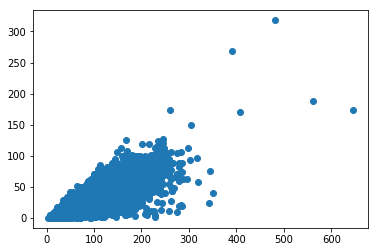

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df['Ability_To_Speak_Irish_Yes_2011'], df['Freq_Of_Irish_Daily_Within_Education_System_2011'])

Calculate correlations between variables

Remove data

Synthesise new set of data with weights according to the original data set